In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
# Load the dataset
data = pd.read_csv('F:\CODSOFT\Moviereview\IMDb Movies India.csv', encoding='ISO-8859-1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
data_cleaned = data.dropna(subset=['Rating'])  
data_cleaned['Votes'] = pd.to_numeric(data_cleaned['Votes'], errors='coerce')
data_cleaned = data_cleaned.dropna(subset=['Genre', 'Director', 'Actor 1'])

data_cleaned['Year'] = data_cleaned['Year'].str.extract(r'(\d{4})').astype(int)
data_cleaned['Votes'] = data_cleaned['Votes'].fillna(data_cleaned['Votes'].median())
data_cleaned['Duration'] = data_cleaned['Duration'].str.extract(r'(\d+)').astype(float)
data_cleaned['Duration'] = data_cleaned['Duration'].fillna(data_cleaned['Duration'].median())

data_cleaned = data_cleaned.drop(['Name'], axis=1)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6904\1137005269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Votes'] = pd.to_numeric(data_cleaned['Votes'], errors='coerce')


In [5]:
data_encoded = pd.get_dummies(data_cleaned, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])
data_encoded.head()

,Year,Duration,Rating,Votes,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama",...,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zebunissa,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
1,2019,109.0,7.0,8.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2019,110.0,4.4,35.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1997,147.0,4.7,827.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2005,142.0,7.4,37.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2012,82.0,5.6,326.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
X = data_encoded.drop('Rating', axis=1)
y = data_encoded['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error: 193744486495078.6
R-squared: -100392498845155.9
Mean Absolute Error (MAE): 5383641.6951293545


RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

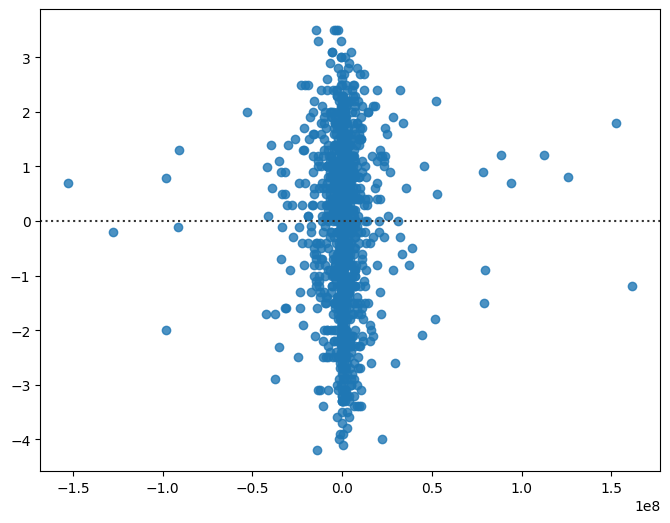

In [8]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.show()

In [9]:
def predict_movie_rating():
    # Get input from the user
    year = int(input("Enter the Year of the movie: "))
    votes = int(input("Enter the number of Votes: "))
    duration = float(input("Enter the Duration (in minutes): "))
    genre = input("Enter the Genre of the movie: ")
    director = input("Enter the Director's name: ")
    actor1 = input("Enter the name of Actor 1: ")
    actor2 = input("Enter the name of Actor 2 (optional, press Enter to skip): ")
    actor3 = input("Enter the name of Actor 3 (optional, press Enter to skip): ")

    # Create a DataFrame for the input movie details
    input_data = {
        'Year': [year],
        'Votes': [votes],
        'Duration': [duration],
        'Genre': [genre],
        'Director': [director],
        'Actor 1': [actor1],
        'Actor 2': [actor2] if actor2 else None,
        'Actor 3': [actor3] if actor3 else None
    } 

    input_df = pd.DataFrame(input_data)
    input_df['Votes'] = pd.to_numeric(input_df['Votes'], errors='coerce').fillna(data_cleaned['Votes'].median())
    input_df['Duration'] = pd.to_numeric(input_df['Duration'], errors='coerce').fillna(data_cleaned['Duration'].median())
    input_df['Year'] = input_df['Year'].astype(int)

    input_encoded = pd.get_dummies(input_df)
    input_encoded = input_encoded.reindex(columns=X_train.columns, fill_value=0)

    predicted_rating = model.predict(input_encoded)[0]
    return predicted_rating

In [11]:
predicted_rating = predict_movie_rating()
print(f'Predicted Rating: {predicted_rating}')

Predicted Rating: 22352112.010034915
